In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv("ts_final.csv")
df.head(5)

,Date,Coal Production,Natural Gas (Dry) Production,Crude Oil Production,Natural Gas Plant Liquids Production,Total Fossil Fuels Production,Nuclear Electric Power Production,Hydroelectric Power Production,Geothermal Energy Production,Solar Energy Production,...,"Motor Gasoline, Excluding Ethanol, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Other Petroleum Products CO2 Emissions,Petroleum Coke CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Residual Fuel Oil CO2 Emissions,Total Energy CO2 Emissions,GDP,Employment Rate,Industrial Output
0,1973-01-01,1.166486,1.908249,1.649833,0.208064,4.932632,0.068103,0.089562,0.000490,Not Available,...,70.948,125.557,8.754,4.850,218.972,48.370,454.082,1377.490000,57.500000,44.419600
1,1973-02-01,1.086072,1.922543,1.525783,0.195184,4.729582,0.064634,0.079544,0.000448,Not Available,...,67.422,113.750,7.674,3.992,202.519,44.686,415.102,1389.622333,57.600000,44.543900
2,1973-03-01,1.196571,1.868430,1.667094,0.214807,4.946902,0.072494,0.088284,0.000464,Not Available,...,75.532,107.700,8.659,4.357,201.245,45.111,407.428,1401.754667,57.700000,44.668200
3,1973-04-01,1.112230,1.777561,1.616791,0.209690,4.716271,0.064070,0.083152,0.000542,Not Available,...,73.415,97.838,8.230,4.179,176.222,35.063,368.210,1413.887000,57.800000,44.792500
4,1973-05-01,1.216978,1.859241,1.665377,0.215398,4.956995,0.062111,0.085643,0.000505,Not Available,...,80.105,92.039,8.688,4.645,188.570,36.889,376.032,1420.537333,57.833333,44.918767


Nulls

In [98]:
# check nulls
null_counts = df.isin(['Not Available']).sum()

null_columns = null_counts[null_counts > 0]
if not null_columns.empty:
    print("Columns with null values:")
    print(null_columns)

Columns with null values:
Solar Energy Production     132
Wind Energy Production      120
Solar Energy Consumption    132
Wind Energy Consumption     120
dtype: int64


In [99]:
# replace nulls for now
df.replace('Not Available', 0, inplace=True)

Basic Summary

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
(df['Date'].min(), df['Date'].max())

(Timestamp('1973-01-01 00:00:00'), Timestamp('2023-07-01 00:00:00'))

In [102]:
df.columns

Index(['Date', 'Coal Production', 'Natural Gas (Dry) Production',
       'Crude Oil Production', 'Natural Gas Plant Liquids Production',
       'Total Fossil Fuels Production', 'Nuclear Electric Power Production',
       'Hydroelectric Power Production', 'Geothermal Energy Production',
       'Solar Energy Production', 'Wind Energy Production',
       'Biomass Energy Production', 'Total Renewable Energy Production',
       'Total Primary Energy Production', 'Coal Consumption',
       'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
       'Petroleum Consumption (Excluding Biofuels)',
       'Total Fossil Fuels Consumption', 'Nuclear Electric Power Consumption',
       'Hydroelectric Power Consumption', 'Geothermal Energy Consumption',
       'Solar Energy Consumption', 'Wind Energy Consumption',
       'Biomass Energy Consumption', 'Total Renewable Energy Consumption',
       'Total Primary Energy Consumption', 'Aviation Gasoline CO2 Emissions',
       'Coal, Including

In [103]:
df.dtypes

Date                                                                datetime64[ns]
Coal Production                                                            float64
Natural Gas (Dry) Production                                               float64
Crude Oil Production                                                       float64
Natural Gas Plant Liquids Production                                       float64
Total Fossil Fuels Production                                              float64
Nuclear Electric Power Production                                          float64
Hydroelectric Power Production                                             float64
Geothermal Energy Production                                               float64
Solar Energy Production                                                     object
Wind Energy Production                                                      object
Biomass Energy Production                                                  float64
Tota

Combining into Categories

In [104]:
def convert_and_sum_columns(df, columns_to_sum, total_column_name):
    for col in columns_to_sum:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df[total_column_name] = df[columns_to_sum].sum(axis=1)

    return df

In [105]:
# Combine all production columns
production_cols = ['Coal Production',
                             'Natural Gas (Dry) Production',
                             'Crude Oil Production',
                             'Natural Gas Plant Liquids Production',
                             'Total Fossil Fuels Production',
                             'Nuclear Electric Power Production',
                             'Hydroelectric Power Production',
                             'Geothermal Energy Production',
                             'Solar Energy Production',
                             'Wind Energy Production',
                             'Biomass Energy Production',
                             'Total Renewable Energy Production',
                             'Total Primary Energy Production']
df = convert_and_sum_columns(df, production_cols, 'Total_Production')

consumption_cols = ['Coal Consumption',
                              'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
                              'Petroleum Consumption (Excluding Biofuels)',
                              'Total Fossil Fuels Consumption',
                              'Nuclear Electric Power Consumption',
                              'Hydroelectric Power Consumption',
                              'Geothermal Energy Consumption',
                              'Solar Energy Consumption',
                              'Wind Energy Consumption',
                              'Biomass Energy Consumption',
                              'Total Renewable Energy Consumption',
                              'Total Primary Energy Consumption']
df = convert_and_sum_columns(df, consumption_cols, 'Total_Consumption')

co2emissions_cols = ['Aviation Gasoline CO2 Emissions',
                                'Coal, Including Coal Coke Net Imports, CO2 Emissions',
                                'Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions',
                                'Hydrocarbon Gas Liquids CO2 Emissions',
                                'Jet Fuel CO2 Emissions',
                                'Kerosene CO2 Emissions',
                                'Lubricants CO2 Emissions',
                                'Motor Gasoline, Excluding Ethanol, CO2 Emissions',
                                'Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions',
                                'Other Petroleum Products CO2 Emissions',
                                'Petroleum Coke CO2 Emissions',
                                'Petroleum, Excluding Biofuels, CO2 Emissions',
                                'Residual Fuel Oil CO2 Emissions',
                                'Total Energy CO2 Emissions']
df = convert_and_sum_columns(df, co2emissions_cols, 'Total_CO2Emissions')

Category EDA

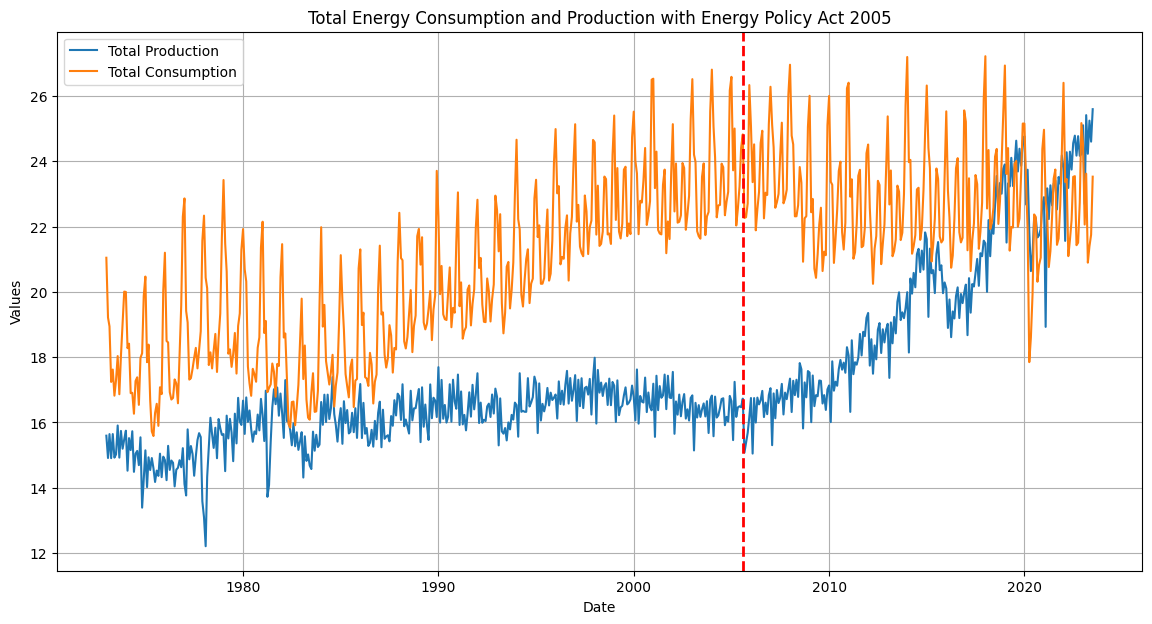

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Total_Production'], label='Total Production')
plt.plot(df['Date'], df['Total_Consumption'], label='Total Consumption')
plt.title('Total Energy Consumption and Production with Energy Policy Act 2005')

policy_act_date = pd.to_datetime('2005-07-29')
plt.axvline(x=policy_act_date, color='red', linestyle='--', lw=2)

# plt.text(policy_act_date, max(df['Total Renewable Energy Consumption']), 'Energy Policy Act 2005', color='red', ha='center')

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

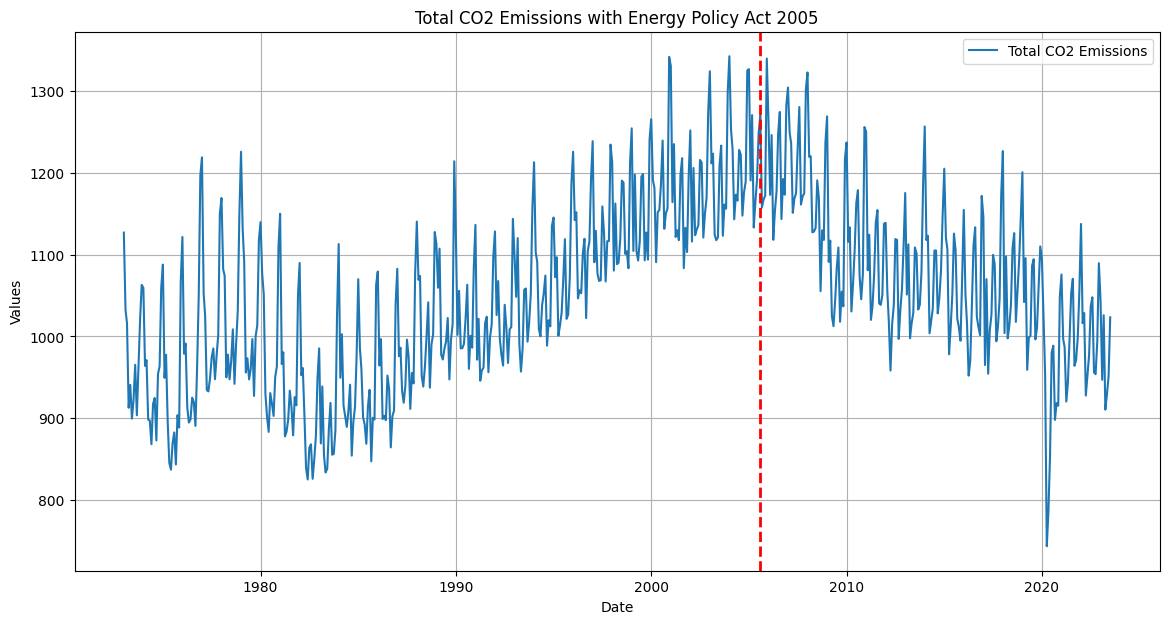

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Total_CO2Emissions'], label='Total CO2 Emissions')
plt.title('Total CO2 Emissions with Energy Policy Act 2005')

policy_act_date = pd.to_datetime('2005-07-29')
plt.axvline(x=policy_act_date, color='red', linestyle='--', lw=2)

#plt.text(policy_act_date, max(df['Total Renewable Energy Consumption']), 'Energy Policy Act 2005', color='red', ha='center')

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
df[['Total_Production', 'Total_Consumption', 'Total_CO2Emissions']].describe()

,Total_Production,Total_Consumption,Total_CO2Emissions
count,607.000000,607.000000,607.000000
mean,17.416833,21.196315,1054.107801
std,2.533759,2.594987,111.108825
min,12.207731,15.583255,743.184000
25%,15.906980,19.074338,970.475500
50%,16.641516,21.576967,1050.815000
75%,17.755014,23.041451,1129.618000
max,25.594962,27.217042,1343.023000


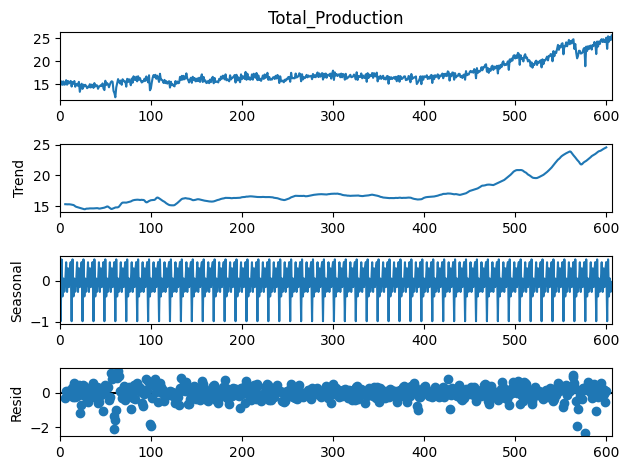

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Total_Production'], model='additive', period=12) 
decomposition.plot()
plt.show()

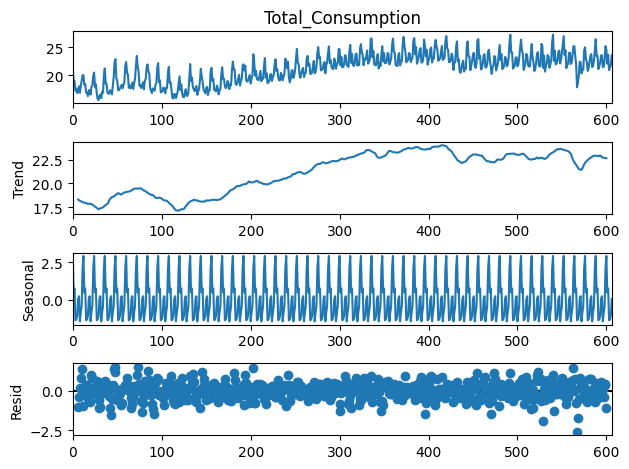

In [110]:
decomposition = seasonal_decompose(df['Total_Consumption'], model='additive', period=12) 
decomposition.plot()
plt.show()

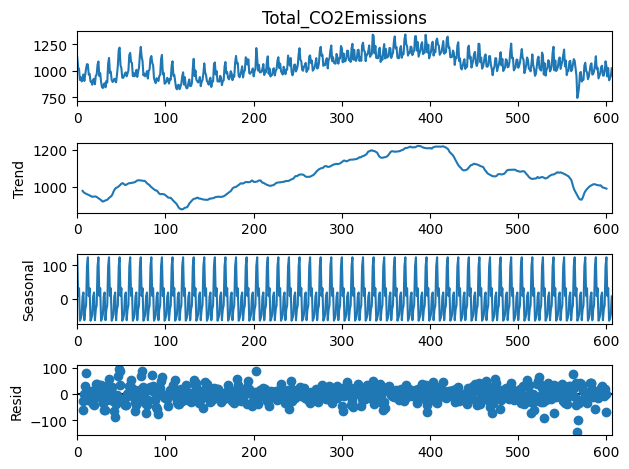

In [111]:
decomposition = seasonal_decompose(df['Total_CO2Emissions'], model='additive', period=12) 
decomposition.plot()
plt.show()

Individual Columns

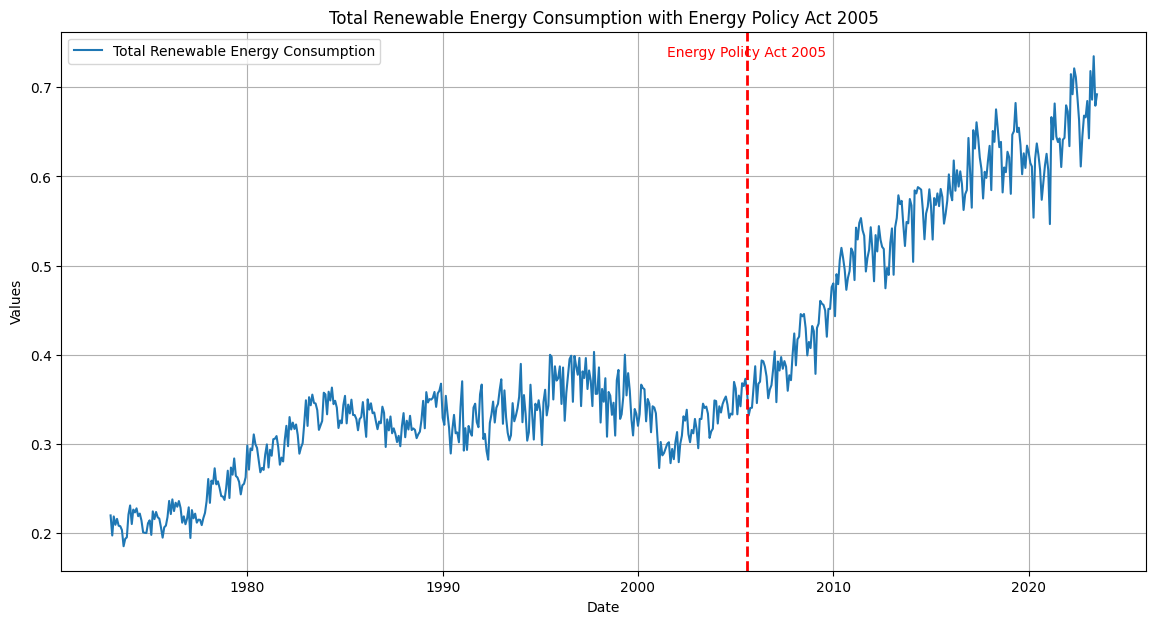

In [112]:
import pandas as pd
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Total Renewable Energy Consumption'], label='Total Renewable Energy Consumption')
policy_act_date = pd.to_datetime('2005-07-29')
plt.axvline(x=policy_act_date, color='red', linestyle='--', lw=2)

plt.text(policy_act_date, max(df['Total Renewable Energy Consumption']), 'Energy Policy Act 2005', color='red', ha='center')

plt.title('Total Renewable Energy Consumption with Energy Policy Act 2005')

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()

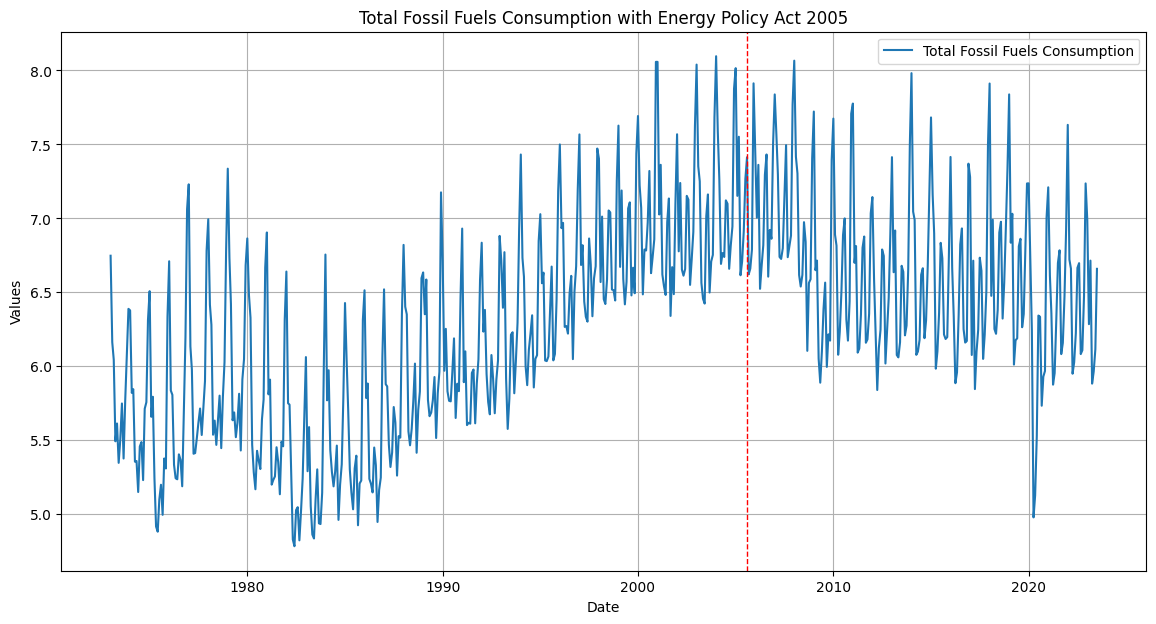

In [113]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Total Fossil Fuels Consumption'], label='Total Fossil Fuels Consumption')
policy_act_date = pd.to_datetime('2005-07-29')
plt.axvline(x=policy_act_date, color='red', linestyle='--', lw=1)  # Draw line

# plt.text(policy_act_date, max(df['Total Renewable Energy Consumption']), 'Energy Policy Act 2005', color='red', ha='left')

plt.title('Total Fossil Fuels Consumption with Energy Policy Act 2005')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()

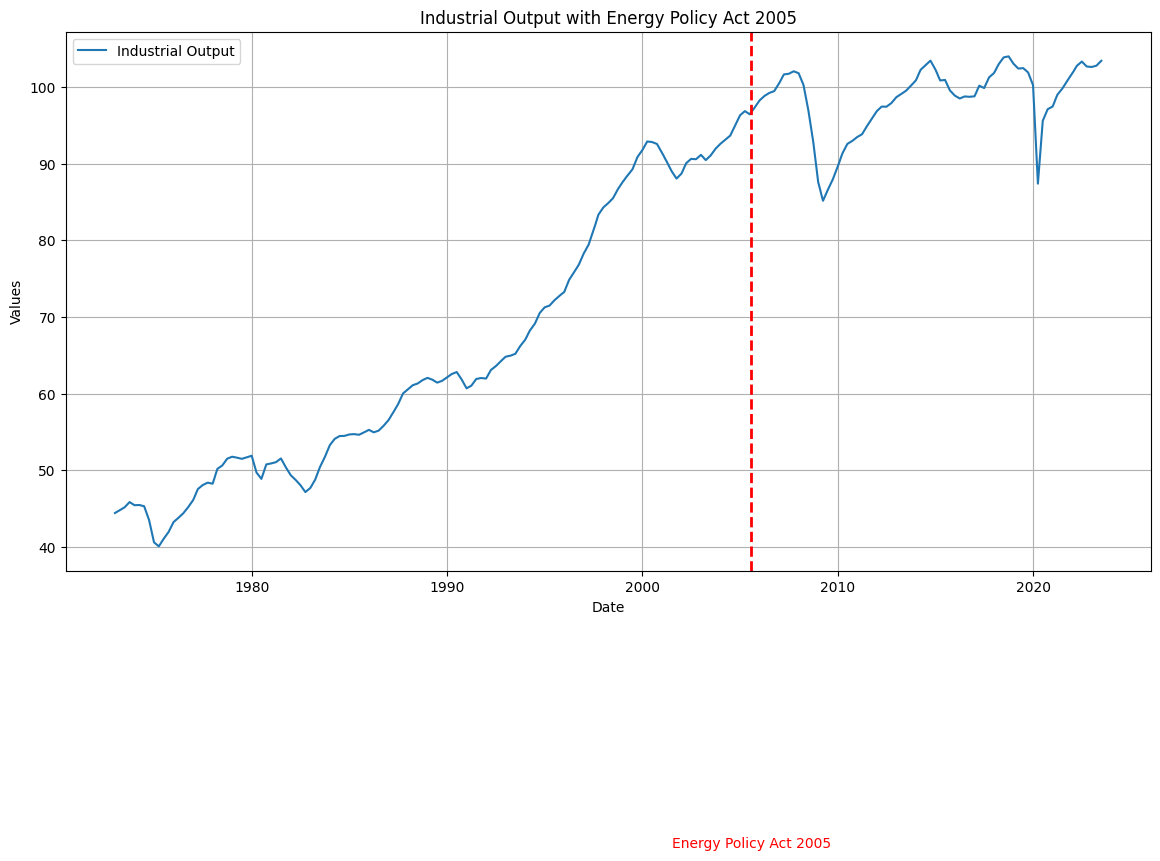

In [114]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Industrial Output'], label='Industrial Output')
policy_act_date = pd.to_datetime('2005-07-29')
plt.axvline(x=policy_act_date, color='red', linestyle='--', lw=2)  # Draw line

plt.text(policy_act_date, max(df['Total Renewable Energy Consumption']), 'Energy Policy Act 2005', color='red', ha='center')

plt.title('Industrial Output with Energy Policy Act 2005')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.show()